# Intro to Julia

## Basics

#### Numbers
These behave as expected.

In [77]:
# Integers and floats
x = 1.0
y = 1

x + y # y gets 'promoted' to a float before being added to x

2.0

You can even do rational numbers

In [78]:
r = 1//2
o = 1//3

r * o

1//6

#### Vectors
Here's how to construct some vectors

In [79]:
v = [1,2,3]

3-element Array{Int64,1}:
 1
 2
 3

In [80]:
# Collect numbers from 1 to 10 (using 1 as the default step size)
v = collect(1:10)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

Some things work as expected. Such as adding two vectors. Let's make the set of 3D unit vectors

In [90]:
x̂ = [1.0,0.0,0.0]
ŷ = [0.0,1.0,0.0]
ẑ = [0.0,0.0,1.0];

In [91]:
x̂ + ŷ

3-element Array{Float64,1}:
 1.0
 1.0
 0.0

What happens here?

In [92]:
x̂ * ŷ

LoadError: MethodError: no method matching *(::Array{Float64,1}, ::Array{Float64,1})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:538
  *(!Matched::Adjoint{var"#s828",var"#s8281"} where var"#s8281"<:(AbstractArray{T,1} where T) where var"#s828"<:Number, ::AbstractArray{var"#s827",1} where var"#s827"<:Number) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/LinearAlgebra/src/adjtrans.jl:283
  *(!Matched::Transpose{T,var"#s828"} where var"#s828"<:(AbstractArray{T,1} where T), ::AbstractArray{T,1}) where T<:Real at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/LinearAlgebra/src/adjtrans.jl:284
  ...

Since there are a number of ways to define multiplication of two vectors, we need to be more specific. Let's use the `LinearAlgebra` package. It holds functions to do $v_1 \cdot v_2$ and $v_1 \times v_2$.

In [93]:
using LinearAlgebra

In [94]:
dot(x̂,ŷ)

0.0

In [95]:
cross(x̂,ŷ)

3-element Array{Float64,1}:
 0.0
 0.0
 1.0

Here, Julia is smart enough to know what we mean: $4\hat{x}$

In [96]:
4 * x̂

3-element Array{Float64,1}:
 4.0
 0.0
 0.0

But here, we run into the same problem as before. Are we doing a dot product? Cross?

In [97]:
[4,5,3] * x̂

LoadError: MethodError: no method matching *(::Array{Int64,1}, ::Array{Float64,1})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:538
  *(!Matched::Adjoint{var"#s828",var"#s8281"} where var"#s8281"<:(AbstractArray{T,1} where T) where var"#s828"<:Number, ::AbstractArray{var"#s827",1} where var"#s827"<:Number) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/LinearAlgebra/src/adjtrans.jl:283
  *(!Matched::Transpose{T,var"#s828"} where var"#s828"<:(AbstractArray{T,1} where T), ::AbstractArray{T,1}) where T<:Real at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/LinearAlgebra/src/adjtrans.jl:284
  ...

A common operation we want to compute is the addition/multiplication of each element in a vector by each element in another vector. To do this we use the `.` operator.

In [98]:
[4,5,3] .* x̂

3-element Array{Float64,1}:
 4.0
 0.0
 0.0

In [100]:
[4,5,3] .+ x̂

3-element Array{Float64,1}:
 5.0
 5.0
 3.0

#### Matrices
We can also construct matrices

In [101]:
A = [1 2; 
     3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [102]:
B = zeros(3,3)

3×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

And index into them, using the (row,column) convention

In [41]:
A[2,1]

3

You can also access it using only one index. This treats the matrix as a vector -- taking each column and attaching it to the bottom of the previous column. So, the indices of a 3x3 matrix M would be:

$$M_{indices} = \begin{pmatrix}
1 & 4 & 7\\
2 & 5 & 8\\
3 & 6 & 9\\
\end{pmatrix}$$

In [106]:
A[1], A[2], A[3], A[4]

(1, 3, 2, 4)

#### Functions
We want to write most of our Julia code in functions. This let's the compiler optimize our code.

Again, this will do what we expect.

In [110]:
function f(x)
    y = x + 1
    return y
end

f (generic function with 2 methods)

In [111]:
f(2)

3

We can also define a function with the same name, using different arguments

In [113]:
function f(x,y)
    z = x + y + 1
    return z
end

f (generic function with 2 methods)

In [114]:
f(1,2)

4

Remember, if we want to do operations with vectors, we need the `.` operator.

In [115]:
function g(x)
    y = x .+ 1
    return y
end

g (generic function with 1 method)

In [116]:
g(x̂)

3-element Array{Float64,1}:
 2.0
 1.0
 1.0

Julia uses 'pass-by-sharing' for function. All this means is that if you give a function an array (or matrix, etc.) and it is modified inside of the function, it remains modified after the function is called. Let's look at an example. Here we're defining a function that takes an array, adds one to each element of that array, and saves it back into the original array. ($\bf{Note}$: When writing functions that modify the arguments, the convention is to place an '!' after the name.)

In [117]:
function g!(x)
    x .= x .+ 1
    return
end

g! (generic function with 1 method)

In [118]:
v = [1.0,2.0,3.0]
g!(v)
v

3-element Array{Float64,1}:
 2.0
 3.0
 4.0

The important thing here is that the `v` is no longer what we originally defined it as. It was modified inside the `g!`.

## Packages
We can add packages inside our Jupyter notebooks -- just like on the command line. Let's add the plots package.

In [119]:
using Pkg

In [120]:
Pkg.add("Plots")

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [121]:
using Plots

## Plotting
Now that we know how to make arrays of data and functions to operate on them, let's make some plots! First, let's define a line in function notation. This an another way of defining functions in Julia

In [122]:
f(x) = 3 * x + 2

f (generic function with 2 methods)

Now, create a vector of elements 0 to 10 (steping by 1) and pass it to out line function. Notice we use the `.` at the end of the function name. This tells the function that it's getting an array, and to operate on each element of that array seperately, and return an array of the same size.

In [123]:
x = collect(0:10)
y = f.(x);

And plot!

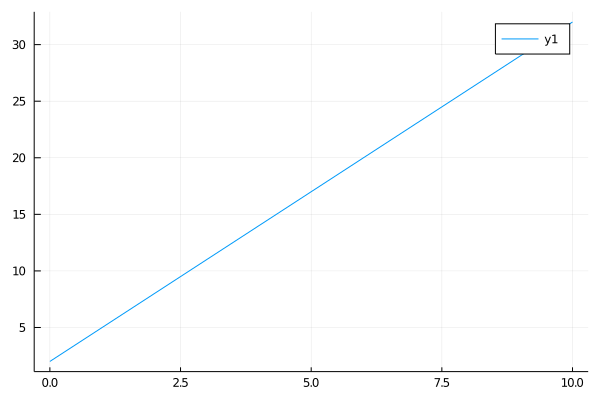

In [124]:
plot(x,y)

To plot just points, use the `scatter` function

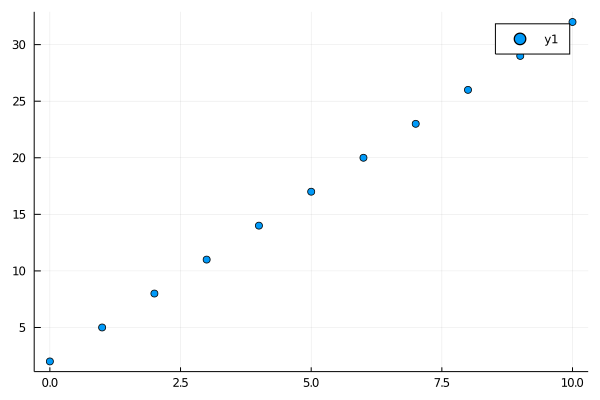

In [125]:
scatter(x,y)